# 3.1 Preprocessing (1 point)
(a) Load the dataset pca2.csv. Compute the Principal Components PC1 and PC2 and plot
the data in the coordinate system PC1 vs. PC2 – What do you observe?


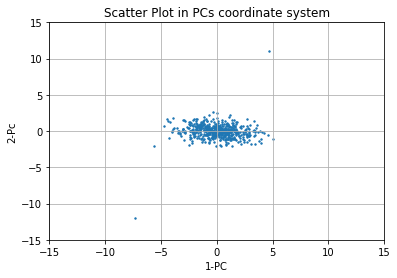

In [163]:
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt
%matplotlib inline


Data = genfromtxt('pca2.csv', delimiter=',', skip_header=True,dtype='float')

def PCA(X):
    mean=np.mean(X,axis=0)
    centered=X-mean
    cov=np.cov(centered.T)
    eigVals,eigVects=np.linalg.eig(cov)
    return centered,eigVals,eigVects,np.dot(centered, eigVects)
    
_,_,_,project=PCA(Data)
plt.scatter(project[:, 0], project[:, 1],s=2)
plt.xlabel('1-PC')
plt.ylabel('2-Pc')
plt.title('Scatter Plot in PCs coordinate system')
plt.axis([-15,15,-15,15])
plt.grid()

(b) Remove Observations 17 and 157 and redo the first two steps. What is the difference?


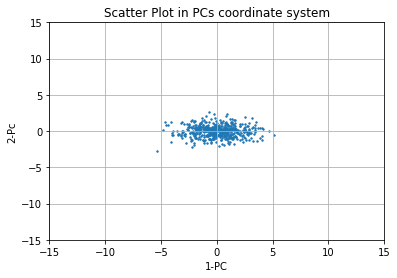

In [167]:

Data = np.delete(Data, (157 - 1), axis=0)
Data = np.delete(Data, (17 - 1), axis=0)

_,_,_,project=PCA(Data)
plt.scatter(project[:, 0], project[:, 1],s=2)
plt.xlabel('1-PC')
plt.ylabel('2-Pc')
plt.title('Scatter Plot in PCs coordinate system')
plt.axis([-15,15,-15,15])
plt.grid()

# In the second plot, the two outliers(lower left and upper right) are missing

# 3.2 Whitening (3 points)
(a) Load the dataset pca4.csv and check for outliers in the individual variables

In [3]:
pca4 = genfromtxt('pca4.csv', delimiter=',', skip_header=True,dtype='float')
print(pca4)

[[ 2.22596182  0.10936602 -0.05005915  0.51865154]
 [-1.07500369 -4.83287743 -0.41939855  0.8437185 ]
 [ 0.33169257  1.49399059 -0.09823864  0.36632831]
 ..., 
 [-1.93296049 -1.31242802  0.04497371 -0.56348563]
 [-3.05101995 -0.25455968  0.10574602 -0.10713459]
 [ 0.27488504  0.83508105 -0.02236534  0.34895602]]


(b) Do PCA on a reasonable subset of this data. Use a scree plot to determine how many PCs
represent the data well.

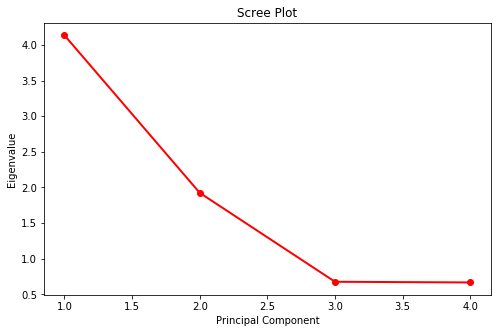

In [4]:
centered,eigVals,eigVects,project=PCA(pca4)

num_vars=np.shape(pca4)[1]
fig = plt.figure(figsize=(8,5))
sing_vals = np.arange(num_vars) + 1
plt.plot(sing_vals, eigVals, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.show()

#from the scree plot, 3 PCs can already represent the data well.

(c) “Whiten” the data, i.e. create a set of 4 uncorrelated variables with mean 0 and standard
deviation equal to 1. This can be done e.g. using the transformation
Z = XEΛ ˜ −1/2
.
The new variables zi form the columns of Z, E is a matrix containing in its columns the normalized
eigenvectors of the covariance matrix C of the centered data X˜ (variables columnwise)
and Λ is a diagonal matrix containing the corresponding eigenvalues.

In [5]:
diag=np.diag(eigVals)
inv_diag=np.linalg.inv(diag)
sqrinv_diag=np.sqrt(inv_diag)
Z=np.dot(np.dot(centered,eigVects),sqrinv_diag)

(d) Make 3 heat plots of the (i) 4x4 covariance matrix C, (ii) the covariance matrix of the data
projected onto PC1-PC4, and (iii) of the whitened variables.

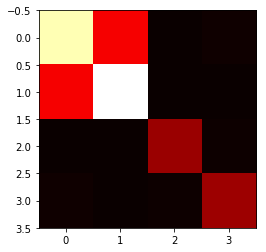

In [6]:
C=np.cov(centered.T)
plt.imshow(C, cmap='hot', interpolation='nearest')
plt.show()

In [83]:
a=np.dot(project,C)

# 3.3 Oja’s Rule: Derivation

# 3.4 Oja’s Rule: Application

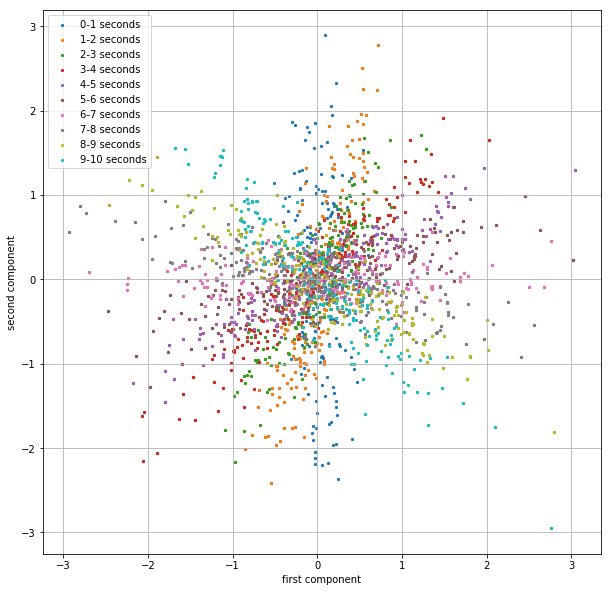

In [126]:
import pylab
Data = genfromtxt('data-onlinePCA.txt', delimiter=',', skip_header=True,dtype='float')

plt.figure(figsize=(10,10))
plt.xlabel('first component')
plt.ylabel('second component')
plt.grid()

for i in range(1,10 + 1):
    one_second = Data[(i-1)*200:200+i*200,:]
    plt.scatter(one_second[:,1],one_second[:,2],s=5,label=str(i-1) + "-"+str(i)+" seconds")
    
    
pylab.legend(loc='upper left')
plt.show()


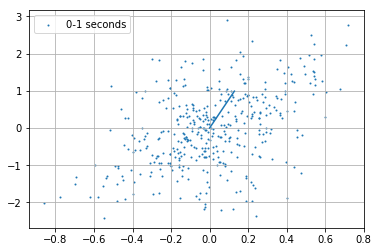

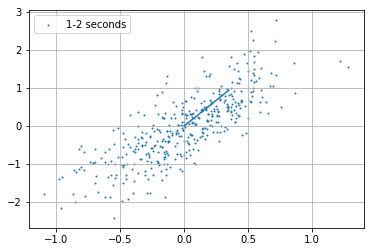

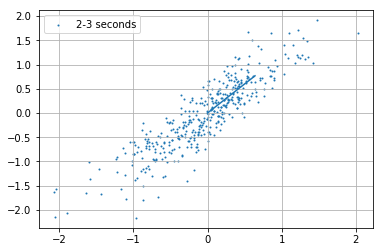

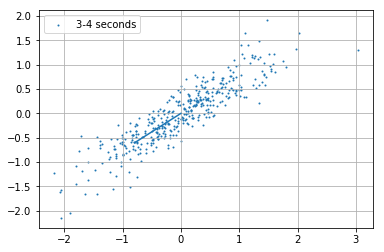

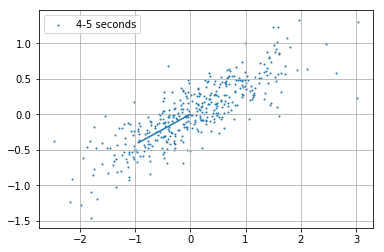

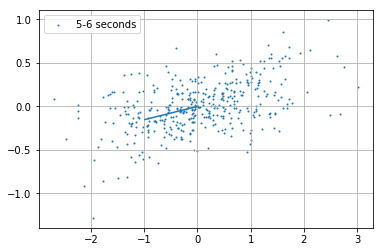

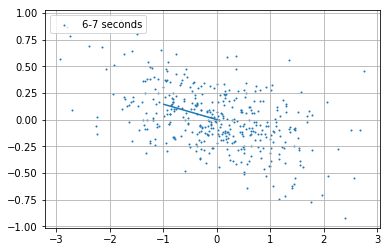

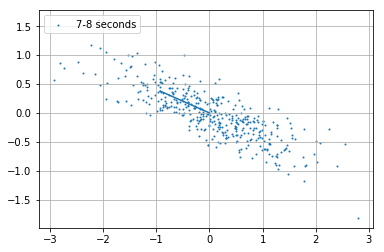

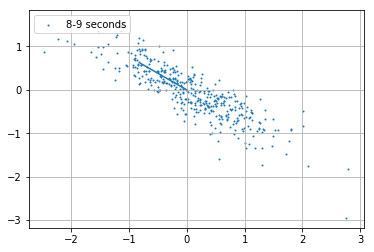

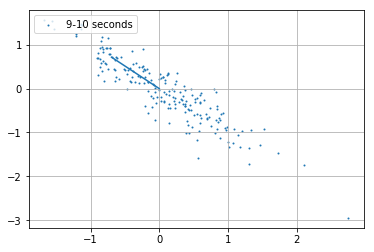

In [131]:

for i in range(1,10 + 1):
    one_second = Data[(i-1)*200:200+i*200,:]
    plt.scatter(one_second[:,1],one_second[:,2],s=1,label=str(i-1) + "-"+str(i)+" seconds")
    mean = np.mean(one_second, axis=0)
    centered = one_second[:,1:] - mean[1:]
    C = np.cov(centered.T)
    w,v = np.linalg.eigh(C)
    evectors = v[::-1]
    evalues = w[::-1]
    plt.plot([0,evectors[0][0]],[0,evectors[0][1]])
    pylab.legend(loc='upper left')
    plt.grid()
    plt.show()

   
